In [1]:
import matplotlib.pyplot as plt
import torch
from torch import nn
import torchvision
import torch.optim as optim
import numpy as np
print(torch.cuda.is_available())

True


In [2]:
device = torch.device('cuda')
batch_size=100
trans = torchvision.transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(
    root="./data", train=True, transform=trans, download=True)
mnist_test = torchvision.datasets.FashionMNIST(
    root="./data", train=False, transform=trans, download=True)

def batch_data(X,batch_size,device=torch.device('cuda')):
    temp_x=[i[0][0].unsqueeze_(0) for i in X]#升维再导入
    data_x=torch.cat(temp_x).reshape(batch_size,-1,28,28).unsqueeze_(2)#加上通道数
    data_y=torch.tensor([i[1] for i in X]).reshape(batch_size,-1)
    return data_x.to(device),data_y.to(device)

def plot_res():
    fig,ax=plt.subplots(1,2)
    for i in range(len(loss_arr)):
        if(isinstance(loss_arr[i],np.ndarray)==False):
            loss_arr[i]=loss_arr[i].to(torch.device('cpu')).detach().numpy()

    ax[0].plot(range(len(loss_arr)),loss_arr)
    ax[1].plot(range(len(loss_arr)),acc_arr)

    plt.tight_layout()
    # plt.subplots_adjust(left=None, bottom=None, right=None, top=None, \
    #     wspace=0.45, hspace=None)
    ax[0].set_title("loss")
    ax[1].set_title("accuracy")
    plt.show()

def start_train():
    net.train()#启用 BatchNormalization 和 Dropout
    for i in range(epoch):
        for j in range(batch_size):
            optimizer.zero_grad()
            y_hat=net(train_x[j])
            l=loss(y_hat,train_y[j])
            l.backward()
            optimizer.step()
        cur_acc=calc_acc(test_x.reshape((-1,1,28,28)),test_y.reshape(-1,1),net)
        print(f'loss= {l:.3f} accuracy={cur_acc:.3f}')        
        loss_arr.append(l)
        acc_arr.append(cur_acc)
        
def calc_acc(X,y,net):
    tot=0
    res=net(X)
    for i in range(X.shape[0]):
        if(res[i].argmax().item()==y[i].item()):
            tot+=1
    return tot/X.shape[0]
        
batch_size=100
(train_x,train_y)=batch_data(mnist_train,batch_size,device)
(test_x,test_y)=batch_data(mnist_test,batch_size,device)


test_x.shape

100%|██████████| 26421880/26421880 [00:02<00:00, 11649107.59it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 209065.30it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3853504.19it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 9886573.71it/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



torch.Size([100, 100, 1, 28, 28])

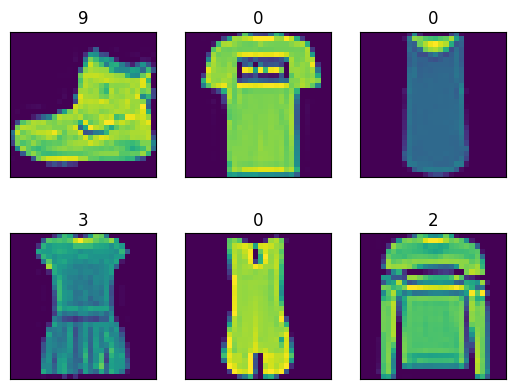

In [4]:

text_labels =range(10)
fig,axes=plt.subplots(2,3)
axes=axes.flatten()#一维
for i in range(6):
    ax=axes[i]
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.imshow(train_x[0][i][0].cpu())
    ax.set_title(text_labels[train_y[0][i].cpu()])
plt.show()#必须放在cpu上

深度全连接网络（2个隐藏层以上）作为分类器，添加dropout，正则化等技巧

In [ ]:
# Fashion 4
net3 = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 500),
            nn.ReLU(),
            nn.Dropout(0.5),  # 添加Dropout
            nn.Linear(500, 1000),
            nn.ReLU(),
            nn.Dropout(0.2),  # 添加Dropout
            nn.Linear(1000, 300),
            nn.ReLU(),
            nn.Dropout(0.5),  # 添加Dropout
            nn.Linear(300, 10)
        )

net=net3
loss_arr,acc_arr=[],[]
lr=0.001
epoch=300
net.to(device)
optimizer = optim.Adam(net.parameters(), lr=lr, betas=(0.9, 0.98), eps=1e-9,weight_decay=0.0001)
loss=nn.CrossEntropyLoss()
start_train()

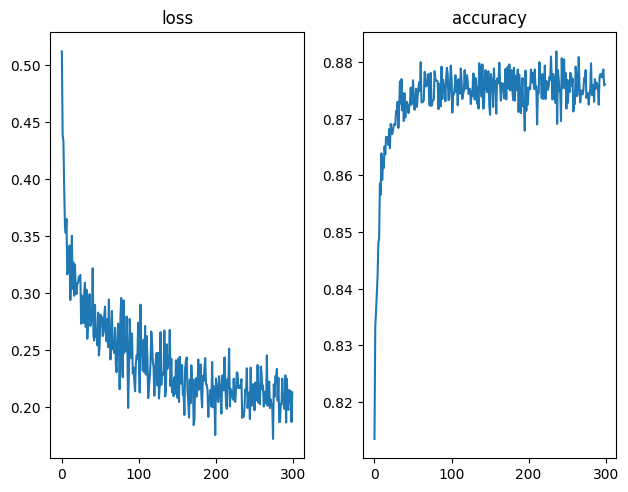

In [8]:
plot_res()

In [9]:
torch.save(net.state_dict(), "/kaggle/working/net-fashion.params")

In [ ]:
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5,self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1,16,5),# 16*28*28
            nn.ReLU(),
            nn.MaxPool2d(2,2),# 16*14*14
            nn.Conv2d(16,32,5),# 32*10*10
            nn.ReLU(),
            nn.MaxPool2d(2,2)# 32*5*5
        )
        self.classifier = nn.Sequential(
            nn.Linear(32*4*4,120),
            nn.ReLU(),
            nn.Linear(120,84),
            nn.ReLU(),
            nn.Linear(84,10)
        )
    
    def forward(self, x):
        x = self.features(x)
#         print(x.shape)
        x = x.view(-1, 32*4*4)
        x = self.classifier(x)
        return x
    
def start_train():
    net.train()#启用 BatchNormalization 和 Dropout
    for i in range(epoch):
        for j in range(batch_size):
            optimizer.zero_grad()
            y_hat=net(train_x[j])
            l=loss(y_hat,train_y[j])
            l.backward()
            optimizer.step()
        
        cur_acc=calc_acc(test_x.reshape((-1,1,28,28)),test_y.reshape(-1,1),net)
        loss_arr.append(l)
        acc_arr.append(cur_acc)
        if(i%10)==0:
            print(f'epoch {i} loss= {l:.3f} accuracy={cur_acc:.3f}')        
           
    
net=LeNet5()

loss_arr,acc_arr=[],[]
lr=0.0001
epoch=1000
net.to(device)
# print(net(train_x[0]).shape)
optimizer = optim.Adam(net.parameters(), lr=lr, betas=(0.9, 0.98), eps=1e-9,weight_decay=0.001)
loss=nn.CrossEntropyLoss()
start_train()

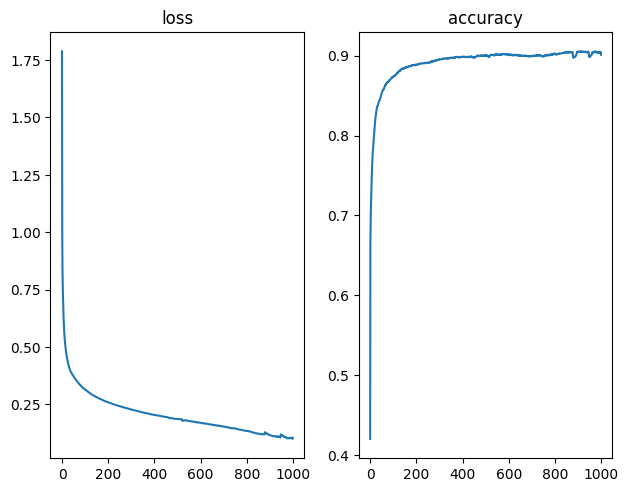

In [14]:
plot_res()

In [15]:
torch.save(net.state_dict(), "/kaggle/working/lenet5-fashion.params")

从提供的输出来看，所有网络结构都随着训练的进行逐渐降低了损失并提高了准确率。
带有Dropout的net3在训练过程中损失和准确率的波动似乎较小，这可能是由于Dropout减少了过拟合，使得网络泛化能力更强。
LeNet-5结构在训练过程中显示出较低的损失和较高的准确率，这表明卷积神经网络在图像识别任务上通常表现更好，因为它们能够更有效地捕捉图像的局部特征。

## 结论

卷积神经网络（如LeNet-5）在图像识别任务上通常优于传统的全连接网络，因为它们能够更好地捕捉图像的局部特征。

增加网络深度（如net2）可以帮助网络学习更复杂的特征，但也可能导致过拟合。

使用Dropout（如net3）是一种有效的正则化手段，可以提高网络的泛化能力。